In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project Intro

For this project, we'll look at a baseball data set and see what interesting questions we answer and go through the entire data analysis process. The data comes from Sean Lahman and can be found [here.](http://www.seanlahman.com/baseball-archive/statistics/)

For this project we're going to focus on a few areas of the data analysis process including: 
- Data Wrangling
- Exploration
- Anaylsis
- Conclusion


The first thing you should notice when downloading the data is that they come in a number of different csv files. For example there's a seperate csv for batting, pitching, and fielding stats. In the Readme file, Sean also tells us which data is in each different csv such as the year and playerid. The playerid is really important as it will be used as a primary key so that we can join different tables together.

Before we look at the data, we should figure out what questions we want to try and answer. Here's what we're going to try and answer:

- Are there any interesting patterns within the data that don't include perfomance metrics?
- What is the relationship between different batting metrics? Do any have a strong negative or positive relationship?

#Data Wrangling

Now that we know what questions we want to answer, we can pull in the right data and start to look at what we're going to be working with. It looks like we'll need the batting and master datasets, so let's pull those in.

In [3]:
# Read in data
batting_data = pd.read_csv("Batting.csv")
batting_data.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19,3,1,2,5,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27,1,1,0,2,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16,6,2,2,1,NaN,NaN,NaN,NaN,NaN


In [4]:
# Read in data
master_data = pd.read_csv("Master.csv")
master_data.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


# Data Exploration

In pandas we can use `.info()` on a dataframe to show a nice summary of the dataset, such as the number of columns, the number of attributes in each column, and the data type of each column. 

In [5]:
batting_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.8+ MB


In [6]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18846 entries, 0 to 18845
Data columns (total 24 columns):
playerID        18846 non-null object
birthYear       18703 non-null float64
birthMonth      18531 non-null float64
birthDay        18382 non-null float64
birthCountry    18773 non-null object
birthState      18220 non-null object
birthCity       18647 non-null object
deathYear       9336 non-null float64
deathMonth      9335 non-null float64
deathDay        9334 non-null float64
deathCountry    9329 non-null object
deathState      9277 non-null object
deathCity       9325 non-null object
nameFirst       18807 non-null object
nameLast        18846 non-null object
nameGiven       18807 non-null object
weight          17975 non-null float64
height          18041 non-null float64
bats            17655 non-null object
throws          17868 non-null object
debut           18653 non-null object
finalGame       18653 non-null object
retroID         18792 non-null object
bbrefID        

There seems to be a lot of missing data, but as we saw above when running `.head()`, the data goes back a long time so it's understandable that it may not all be there.

# Anaylsis

**Question 1**

On interesting table is the master table, which biographical information is stored. Typically, you can use this to find the names of the players that correspond to the playerID, but i wanted to take a look and see if we can spot any interesting trends. It's been said that most players in MLB have been born in August, let's take a look at every player since 1950 and see what we can find. 

In [7]:
subset = master_data[master_data["birthYear"]>=1950]

In [8]:
subset.birthMonth.value_counts()/len(subset.birthMonth) * 100

8     10.570797
10     9.465609
9      9.140554
11     8.737485
1      8.620465
12     8.035366
4      8.022364
3      8.022364
5      7.827331
2      7.658302
6      7.086205
7      6.813158
dtype: float64

Interesting! Looks like what people are saying is true, but let's try and visulize it a bit clearer.

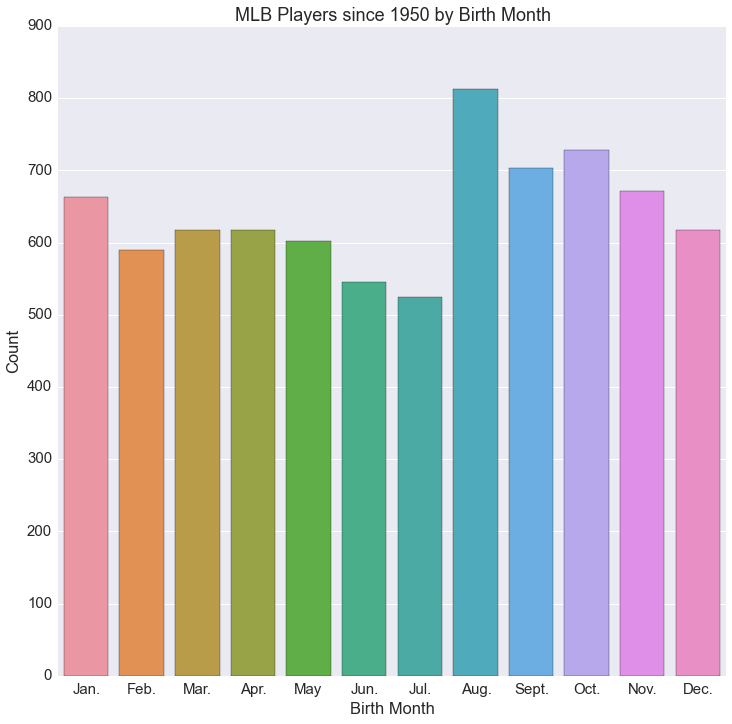

In [10]:
months = ('Jan.','Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.')
sns.set(font_scale=1.5) # change font size
plot = sns.factorplot(x="birthMonth",data=subset, kind="count",order = range(1,13),size=10)
plot.set_xticklabels(months)
plot.set_axis_labels(y_var ="Count", x_var= "Birth Month")
sns.plt.title("MLB Players since 1950 by Birth Month")
plt.show()

Since the data contains a large sample (7000+), it doesn't seem like this would be random. Turns out that it is not. For a long time in the United States, the cutoff date for youth baseball leagues was July 31. The result is that the oldest players in the league ended up being born in August. This is important, because going forward that player would always be closer to the oldest player in each league which is significant because the player who is a year older will, on average, be more physically advanced than the younger players in the league. Eventually this will make a difference as the better players will have more opportunities to play against better comptetion, which in turn would lead them to be exposed to more opportunites to be seen by scouts.

**Question 2**

- What is the relationship between different batting metrics? Do any have a strong negative or positive relationship?

The first step is to merge our datasets so we can have all of our data in one place.

In [6]:
df = pd.merge(batting_data, master_data, on='playerID')

In [7]:
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,Addy,Robert Edward,160,68,L,L,1871-05-06,1877-10-06,addyb101,addybo01
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,Addy,Robert Edward,160,68,L,L,1871-05-06,1877-10-06,addyb101,addybo01
3,addybo01,1873,2,BS1,NaN,31,152,37,54,5,...,Addy,Robert Edward,160,68,L,L,1871-05-06,1877-10-06,addyb101,addybo01
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,Addy,Robert Edward,160,68,L,L,1871-05-06,1877-10-06,addyb101,addybo01


In [8]:
#Grab the columns we want
cols = [
 "yearID",
 "nameFirst",
 "nameLast",
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF']

df = df[cols]

In [9]:
df.head()

,yearID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF
0,1871,Frank,Abercrombie,1,4,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,1871,Bob,Addy,25,118,30,32,6,0,0,13,8,1,4,0,NaN,NaN,NaN,NaN
2,1873,Bob,Addy,10,51,12,16,1,0,0,10,0,1,2,0,NaN,NaN,NaN,NaN
3,1873,Bob,Addy,31,152,37,54,5,2,1,36,2,3,1,0,NaN,NaN,NaN,NaN
4,1874,Bob,Addy,50,213,25,51,9,2,0,23,4,2,1,0,NaN,NaN,NaN,NaN


In baseball, plate appearances are normally better when comparing data because they include a broader number of plays than at bats do. So let's add in PA's.

In [10]:
df["PA"] = df["AB"] + df["BB"] +df["HBP"] +df["SH"] +df["SF"]

In [11]:
df.head()

,yearID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,PA
0,1871,Frank,Abercrombie,1,4,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1871,Bob,Addy,25,118,30,32,6,0,0,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,1873,Bob,Addy,10,51,12,16,1,0,0,10,0,1,2,0,NaN,NaN,NaN,NaN,NaN
3,1873,Bob,Addy,31,152,37,54,5,2,1,36,2,3,1,0,NaN,NaN,NaN,NaN,NaN
4,1874,Bob,Addy,50,213,25,51,9,2,0,23,4,2,1,0,NaN,NaN,NaN,NaN,NaN


Now let's subset the data by just looking at the last 10 years of data and where the player had at least 502 PAs (the the number needed to qualify for the batting title).

In [12]:
data = df[(df["yearID"]>= 2005) & (df["PA"]>= 502)]

In [13]:
data.head()

,yearID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,PA
71020,2005,Craig,Biggio,155,590,94,156,40,1,26,69,11,1,37,90,2,17,4,3,651
71021,2006,Craig,Biggio,145,548,79,135,33,0,21,62,3,2,40,84,1,9,5,5,607
71022,2007,Craig,Biggio,141,517,68,130,31,3,10,50,4,3,23,112,0,3,7,5,555
71817,2005,Gary,Sheffield,154,584,104,170,27,0,34,123,10,2,78,76,7,8,0,5,675
71819,2007,Gary,Sheffield,133,494,107,131,20,1,25,75,22,5,84,71,2,9,0,6,593


Looks good, lets add in a few more common stats:

In [15]:
data["TB"] = data["H"] + data["2B"] + (2 * data["3B"]) + (3 * data["HR"])
data["AVG"] = data["H"] / data["AB"]
data["OBP"] = (data["H"] + data["BB"] + data["HBP"]) / (data["AB"] + data["BB"] + data["HBP"] + data["SF"])
data["SLG"] = data["TB"] / data["AB"]
data["ISO"] = data["SLG"] - data["AVG"]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [16]:
data.head()

,yearID,nameFirst,nameLast,G,AB,R,H,2B,3B,HR,...,IBB,HBP,SH,SF,PA,TB,AVG,OBP,SLG,ISO
71020,2005,Craig,Biggio,155,590,94,156,40,1,26,...,2,17,4,3,651,276,0.264407,0.324575,0.467797,0.203390
71021,2006,Craig,Biggio,145,548,79,135,33,0,21,...,1,9,5,5,607,231,0.246350,0.305648,0.421533,0.175182
71022,2007,Craig,Biggio,141,517,68,130,31,3,10,...,0,3,7,5,555,197,0.251451,0.284672,0.381044,0.129594
71817,2005,Gary,Sheffield,154,584,104,170,27,0,34,...,7,8,0,5,675,299,0.291096,0.379259,0.511986,0.220890
71819,2007,Gary,Sheffield,133,494,107,131,20,1,25,...,2,9,0,6,593,228,0.265182,0.377740,0.461538,0.196356


Now let's take a look at the correlation between a few different stats.

In [33]:
corr_cols = [ 'R', 'HR', 'RBI', 'SB', 'BB','AVG', 'OBP', 'SLG', 'ISO']
data = data[corr_cols]
corr = data.corr()

In [37]:
corr

,R,HR,RBI,SB,BB,AVG,OBP,SLG,ISO
R,1.000000,0.480054,0.494331,0.343283,0.505144,0.452910,0.563952,0.576083,0.459399
HR,0.480054,1.000000,0.843753,-0.274299,0.472036,0.089840,0.360252,0.853101,0.950104
RBI,0.494331,0.843753,1.000000,-0.288213,0.417952,0.306066,0.431543,0.807209,0.796317
SB,0.343283,-0.274299,-0.288213,1.000000,-0.035744,0.124877,0.014464,-0.179579,-0.266785
BB,0.505144,0.472036,0.417952,-0.035744,1.000000,0.095629,0.726747,0.450060,0.478831
AVG,0.452910,0.089840,0.306066,0.124877,0.095629,1.000000,0.708506,0.525383,0.146343
OBP,0.563952,0.360252,0.431543,0.014464,0.726747,0.708506,1.000000,0.655435,0.432936
SLG,0.576083,0.853101,0.807209,-0.179579,0.450060,0.525383,0.655435,1.000000,0.918591
ISO,0.459399,0.950104,0.796317,-0.266785,0.478831,0.146343,0.432936,0.918591,1.000000


While the dataframe is good showing the individual correlations, it isn't apparrent which stats are most highly correlated. For this we can use Seaborn's heatmap plot.

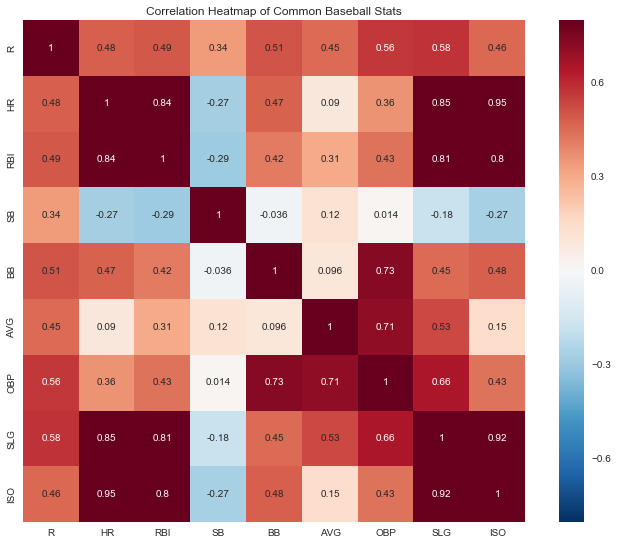

In [50]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
heat_plot  = sns.heatmap(corr, annot=True,vmax=.8, square=True)
heat_plot.set_title("Correlation Heatmap of Common Baseball Stats")

Here we can see the correlation between each of the stats. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. The number will always be between -1 and 1. Always keep in mind that correlation does not mean causation.

So what we can see from this is the relationship between each of the stats. For example, you can see the correlation between walks (BB) and and homeruns (HR) is .47. Which shows us there is a positive relationship. One interesting observation is with stolen bases, it makes sense that the correlation is positive between SBs and Runs as you steal bases, it increases the odds of scoring since it's easier to score from second than it is from first. However, we can see that steals don't correlate well with most other stats.

# Conclusion

In this analysis we used a baseball dataset to analyze the biographgical patterns as well as the relationship between popular statistics. While there were interesting findings, the limitations in the analysis should be examined. For example, there are a lot of missing values in the dataset overall, to overcome this I looked at a subset of the data that had more up to date information. There was also no statistical testing that was done in solving either of the questions as they were more exploratory in nature.